In [31]:
"""Analysis of the greedy results"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.core import decode_filename, save_plot, analysis_filename, ImageFormat

In [4]:
basic = [
    "optimal_greedy_test_basic_j12_s2_0",
    # "optimal_greedy_test_basic_j15_s2_0",
    "optimal_greedy_test_basic_j15_s3_0",
    "optimal_greedy_test_basic_j25_s5_0",
    "optimal_greedy_test_basic_j50_s5_0"
]

big_small = [
    "optimal_greedy_test_big_small_j12_s2_0",
    # "optimal_greedy_test_big_small_j15_s2_0",
    "optimal_greedy_test_big_small_j15_s3_0",
    "optimal_greedy_test_big_small_j25_s5_0",
    "optimal_greedy_test_big_small_j50_s7_0",
    "optimal_greedy_test_big_small_j75_s8_0",
    "optimal_greedy_test_big_small_j100_s10_0"
]

In [5]:
encoded_filenames = basic
x_axis = 'Sum Value'
title = "{} of {} model".format(x_axis, 'Basic')

In [6]:
data = []
model_names: List[str] = []
test_name: str = ''

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename('greedy', encoded_filename)
    model_names.append(model_name)
    
    with open(filename) as file:
        json_data = json.load(file)
        
        for pos, results in enumerate(json_data):
            # Find the best results of sum value or percentage tasks from all of the algorithms
            best_sum_value = max(r['sum value'] for a, r in results.items()
                                 if a != 'Relaxed' and type(r) is dict)
            best_percentage_tasks = max(r['percentage tasks'] for a, r in results.items()
                                       if a != 'Relaxed' and type(r) is dict)
            
            for algo_name, algo_results in results.items():
                if type(algo_results) is dict:  # Otherwise optimal or relaxed == 'failure'
                    data.append((pos, model_name, algo_name, algo_results['sum value'],
                                 algo_results['percentage tasks'], algo_results['solve_time'],
                                 algo_results['sum value'] / best_sum_value,
                                 algo_results['percentage tasks'] / best_percentage_tasks))

df = pd.DataFrame(data, columns=['Pos', 'Model Name', 'Algorithm Name', 'Sum Value', 'Percentage Jobs',
                                 'Solve Time', 'Best Sum Value', 'Best Percentage Jobs'])

In [7]:
df = df.loc[~((df['Algorithm Name'].str.contains('Greedy Utility * deadline / Sum', regex=False)) |
              (df['Algorithm Name'].str.contains('Greedy Utility / Sqrt Sum', regex=False)) |
              df['Algorithm Name'].str.contains('Matrix Greedy Sum Exp^3 Percentage', regex=False))]
df['Algorithm Name'].unique()

array(['optimal', 'Relaxed', 'Greedy Utility / Sum, Sum, Percentage Sum',
       'Greedy Utility / Sum, Sum, Expo percentage sum',
       'Greedy Utility / Sum, Sum, Sum of speeds',
       'Greedy Utility / Sum, Product, Percentage Sum',
       'Greedy Utility / Sum, Product, Expo percentage sum',
       'Greedy Utility / Sum, Product, Sum of speeds',
       'Greedy Utility / Sum, Exponential Sum, Percentage Sum',
       'Greedy Utility / Sum, Exponential Sum, Expo percentage sum',
       'Greedy Utility / Sum, Exponential Sum, Sum of speeds',
       'Greedy Utility / Sum, Random, Percentage Sum',
       'Greedy Utility / Sum, Random, Expo percentage sum',
       'Greedy Utility / Sum, Random, Sum of speeds',
       'Matrix Greedy Sum Usage', 'Matrix Greedy Sum Percentage',
       'Matrix Greedy Sum Exp Percentage'], dtype=object)

c:\users\mark\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


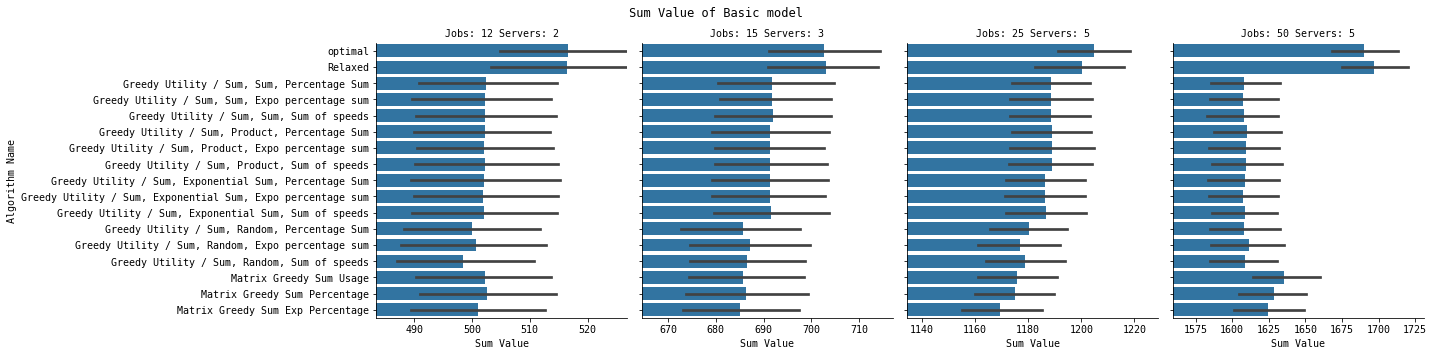

In [8]:
g = sns.FacetGrid(df, col='Model Name', sharex=False, height=5)
g = g.map(sns.barplot, x_axis, 'Algorithm Name').set_titles("{col_name}")

for pos, model in enumerate(model_names):
    values = [np.mean(df[(df['Model Name'] == model) & (df['Algorithm Name'] == algo)][x_axis])
              for algo in df['Algorithm Name'].unique()]
    g.axes[0, pos].set_xlim(min(values) * 0.97, max(values) * 1.02)

g.fig.subplots_adjust(top=0.88)
g.fig.suptitle(title)

g    

In [9]:
df['Algorithm Name'].unique()

array(['optimal', 'Relaxed', 'Greedy Utility / Sum, Sum, Percentage Sum',
       'Greedy Utility / Sum, Sum, Expo percentage sum',
       'Greedy Utility / Sum, Sum, Sum of speeds',
       'Greedy Utility / Sum, Product, Percentage Sum',
       'Greedy Utility / Sum, Product, Expo percentage sum',
       'Greedy Utility / Sum, Product, Sum of speeds',
       'Greedy Utility / Sum, Exponential Sum, Percentage Sum',
       'Greedy Utility / Sum, Exponential Sum, Expo percentage sum',
       'Greedy Utility / Sum, Exponential Sum, Sum of speeds',
       'Greedy Utility / Sum, Random, Percentage Sum',
       'Greedy Utility / Sum, Random, Expo percentage sum',
       'Greedy Utility / Sum, Random, Sum of speeds',
       'Matrix Greedy Sum Usage', 'Matrix Greedy Sum Percentage',
       'Matrix Greedy Sum Exp Percentage'], dtype=object)

In [18]:
short_df = df[(df['Algorithm Name'] == 'optimal') | 
              (df['Algorithm Name'] == 'Relaxed') | 
              (df['Algorithm Name'] == 'Greedy Utility / Sum, Sum, Percentage Sum')].replace('Greedy Utility / Sum, Sum, Percentage Sum', 'Greedy Algo')
short_df

,Pos,Model Name,Algorithm Name,Sum Value,Percentage Jobs,Solve Time,Best Sum Value,Best Percentage Jobs
0,0,Jobs: 12 Servers: 2,optimal,530,0.833,1.260,1.000000,1.000000
1,0,Jobs: 12 Servers: 2,Relaxed,530,0.833,0.072,1.000000,1.000000
2,0,Jobs: 12 Servers: 2,Greedy Algo,504,0.750,0.093,0.950943,0.900360
42,1,Jobs: 12 Servers: 2,optimal,521,0.833,1.140,1.000000,1.000000
43,1,Jobs: 12 Servers: 2,Relaxed,521,0.833,0.065,1.000000,1.000000
...,...,...,...,...,...,...,...,...
33516,198,Jobs: 50 Servers: 5,Relaxed,1654,0.540,30.051,1.009768,1.038462
33517,198,Jobs: 50 Servers: 5,Greedy Algo,1572,0.480,0.352,0.959707,0.923077
33557,199,Jobs: 50 Servers: 5,optimal,1368,0.460,30.020,1.000000,1.000000
33558,199,Jobs: 50 Servers: 5,Relaxed,1370,0.460,30.055,1.001462,1.000000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Save file location: ../figures/greedy/eps/all_shortened.eps
Save file location: ../figures/greedy/png/all_shortened.png


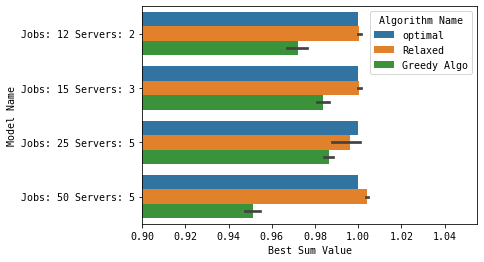

In [34]:
g = sns.barplot(y='Model Name', x='Best Sum Value', hue='Algorithm Name', data=short_df)
g.set_xlim(0.9, 1.055)
save_plot(analysis_filename('all', 'shortened'), "greedy", image_format=ImageFormat.BOTH)


In [ ]:
big_small_a = [
        "optimal_greedy_test_big_small_j12_s2_0",
        # "optimal_greedy_test_big_small_j15_s2_0",
        "optimal_greedy_test_big_small_j15_s3_0",
        "optimal_greedy_test_big_small_j25_s5_0"
    ]

    big_small_b = [
        "optimal_greedy_test_big_small_j50_s7_0",
        "optimal_greedy_test_big_small_j75_s8_0",
        "optimal_greedy_test_big_small_j100_s10_0"
    ]

"""
image_format = ImageFormat.BOTH
for model_files, model_name in [(big_small_b, "Big Small")]:
    for attribute in ['Sum Value', 'Percentage Jobs', 'Solve Time', 'Best Sum Value', 'Best Percentage Jobs']:
        all_algorithms_analysis(model_files, attribute, "{} of {} model".format(attribute, model_name),
                                save_format=image_format)
"""


In [ ]:
"""
Allocation Analysis
"""
dist_name, task_dist, server_dist = load_dist("../../src/models/basic_v2.json")
model_dist = ModelDist(dist_name, task_dist, 20, server_dist, 2)
tasks, servers = model_dist.create()

# Optimal
optimal_algorithm(tasks, servers, 15)
plot_allocation_results(tasks, servers, "Optimal Allocation", ImageFormat.BOTH)
reset_model(tasks, servers)

# Greedy
greedy_algorithm(tasks, servers, ResourceSum(), SumResources(), SumPercentage())

plot_allocation_results(tasks, servers, "Greedy Allocation", ImageFormat.BOTH)